In [1]:
import torch
import math
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import numpy as np
import tensorflow as tf
import itertools

# Tensors

Tensor is a multi-dimensional generalization of a matrix, allowing us to have multidimensional arrays of structured data. We can do mathematical operations on them without knowing what each of the dimensions represents semantically.

They can also be simpler structures like vectors.

![Tensors](https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg)

### Tensor operations

### Construction

```python
torch.tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) → Tensor
```

Constructs a tensor with data.

Parameters:
* data (array_like) – Initial data for the tensor. Can be a list, tuple, NumPy ndarray, scalar, and other types.

Keyword arguments:
* dtype (torch.dtype, optional) – the desired data type of returned tensor. Default: if None, infers data type from data.

* device (torch.device, optional) – the desired device of returned tensor. Default: if None, uses the current device for the default tensor type (see torch.set_default_tensor_type()). device will be the CPU for CPU tensor types and the current CUDA device for CUDA tensor types.

* requires_grad (bool, optional) – If autograd should record operations on the returned tensor. Default: False.

* pin_memory (bool, optional) – If set, returned tensor would be allocated in the pinned memory. Works only for CPU tensors. Default: False.

In [2]:
torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

tensor([[0.1000, 1.2000],
        [2.2000, 3.1000],
        [4.9000, 5.2000]])

In [3]:
torch.tensor([0, 1])

tensor([0, 1])

In [4]:
torch.tensor([[0.11111, 0.222222, 0.3333333]],
    dtype=torch.float64,
    device=torch.device('cuda:0'))

tensor([[0.1111, 0.2222, 0.3333]], device='cuda:0', dtype=torch.float64)

In [5]:
torch.tensor(3.14159)

tensor(3.1416)

In [6]:
torch.tensor([])

tensor([])

In [7]:
x = torch.tensor([1,2,3,4],dtype=torch.float32)
x.requires_grad_(requires_grad=True)
y = torch.tensor([1, 1, 1, 1],dtype=torch.float32,requires_grad=True) # tensor y 
z = x * y
z = z.mean()
z.backward() 
x.grad

tensor([0.2500, 0.2500, 0.2500, 0.2500])

### Concatenation

```python
torch.cat(tensors, dim=0, *, out=None) → Tensor
```

Concatenates the given sequence of seq tensors in the given dimension. All tensors must either have the same shape (except in the concatenating dimension) or be empty.


Parameters:
* tensors (sequence of Tensors) – any python sequence of tensors of the same type. Non-empty tensors provided must have the same shape, except in the cat dimension.

* dim (int, optional) – the dimension over which the tensors are concatenated

Keyword arguments:
* out (Tensor, optional) – the output tensor.

In [8]:
x = torch.randn(2, 3)
x

tensor([[-0.8211,  0.0027, -1.2810],
        [ 1.0488, -1.7867, -0.2224]])

In [9]:
torch.cat((x, x, x), 0)

tensor([[-0.8211,  0.0027, -1.2810],
        [ 1.0488, -1.7867, -0.2224],
        [-0.8211,  0.0027, -1.2810],
        [ 1.0488, -1.7867, -0.2224],
        [-0.8211,  0.0027, -1.2810],
        [ 1.0488, -1.7867, -0.2224]])

In [10]:
a = torch.ones(2,2)
b = torch.zeros(1,2)
torch.cat((a, b))

tensor([[1., 1.],
        [1., 1.],
        [0., 0.]])

### Reshape

```python
torch.reshape(input, shape) → Tensor
```

Returns a tensor with the same data and number of elements as input, but with the specified shape. When possible, the returned tensor will be a view of input. Otherwise, it will be a copy. Contiguous inputs and inputs with compatible strides can be reshaped without copying, but you should not depend on the copying vs. viewing behavior.

Parameters:
* input (Tensor) – the tensor to be reshaped

* shape (tuple of python:ints) – the new shape

In [11]:
a = torch.arange(4.)
a

tensor([0., 1., 2., 3.])

In [12]:
torch.reshape(a, (2, 2))

tensor([[0., 1.],
        [2., 3.]])

In [13]:
b = torch.tensor([[0, 1], [2, 3]])
torch.reshape(b, (-1,))

tensor([0, 1, 2, 3])

### Unbind

```python
torch.unbind(input, dim=0) → seq
```

Removes a tensor dimension.

Parameters:
* input (Tensor) – the tensor to unbind
* dim (int) – dimension to remove

In [14]:
torch.unbind(torch.tensor([[1, 2, 3],
                           [4, 5, 6],
                           [7, 8, 9]]))

(tensor([1, 2, 3]), tensor([4, 5, 6]), tensor([7, 8, 9]))

In [15]:
a, b = torch.unbind(torch.tensor([[1, 2, 3],[3,4,5]]))
a, b

(tensor([1, 2, 3]), tensor([3, 4, 5]))

### Clamp

```python
torch.clamp(input, min=None, max=None, *, out=None) → Tensor
```

Clamps all elements in input into the range [ min, max ]. Letting min_value and max_value be min and max, respectively, this returns:

$ y_i = min(max(x_i, min\_value_i), max\_value_i) $

If min is None, there is no lower bound. Or, if max is None there is no upper bound.

Parameters:
* input (Tensor) – the input tensor.
* min (Number or Tensor, optional) – lower-bound of the range to be clamped to
* max (Number or Tensor, optional) – upper-bound of the range to be clamped to

Keyword arguments:
* out (Tensor, optional) – the output tensor.

In [16]:
a = torch.randn(4)
a

tensor([-0.9820, -0.0614, -1.5405, -0.2294])

In [17]:
torch.clamp(a, min=-0.5, max=0.5)

tensor([-0.5000, -0.0614, -0.5000, -0.2294])

In [18]:
a = torch.randn(5)
b = torch.empty_like(a)
a, b

(tensor([-1.0393,  0.4798,  0.1354,  0.7057,  0.6650]),
 tensor([0., 0., 0., 0., 0.]))

In [19]:
torch.clamp(a, 0.2, 0.6, out=b)
b

tensor([0.2000, 0.4798, 0.2000, 0.6000, 0.6000])

# Gradients

Gradient is simply a vector listing the derivatives of a function with respect to each argument of the function.

On setting requires_grad = True, Tensors start forming a backward graph that tracks every operation applied on them to calculate the gradients using something called a dynamic computation graph.

**Backpropagation:** used to calculate the gradients of the loss keeping the input weights to later update the weights and reduce loss.

Steps for training a neural network:
* Choose architecture
* Forward propagation
* Calculate loss
* Back propgation
* Update weights

The change in the loss for a small change in an input weight is called the gradient of that weight and is calculated using backpropagation. The gradient is then used to update the weight using a learning rate to overall reduce the loss and train the neural net.


![Cost function](https://github.com/rasbt/python-machine-learning-book/raw/master/faq/closed-form-vs-gd/ball.png)

Slope of the angle of our cost function at our current location determines if we are adjusting correctly. A negative slope tells us we are headed downward, which is good because we want to find minima, while a positive slope says that our previous step has overshot our goal (moved beyond the optimal and back up the other side of the function).

Derivative is the rate of change of a function. Descent indicates going to the bottom of a cost function using these changing gradients. To obtain derivatives a process of differentiation is used.

PyTorch includes an automatic differentiation package, *autograd*.

**Autograd:** engine used to calculate derivatives. It records a graph of all the operations performed on a gradient enabled tensor and creates an acyclic graph called the dynamic computational graph.

In [20]:
dtype = torch.float

In [21]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

In [22]:
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

In [23]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

99 323.56683349609375
199 218.98094177246094
299 149.2283935546875
399 102.68341827392578
499 71.60748291015625
599 50.84780502319336
699 36.9712028503418
799 27.689655303955078
899 21.477497100830078
999 17.316816329956055
1099 14.528173446655273
1199 12.657690048217773
1299 11.402091979980469
1399 10.55854606628418
1499 9.991374969482422
1599 9.609687805175781
1699 9.352601051330566
1799 9.179274559020996
1899 9.062309265136719
1999 8.983297348022461


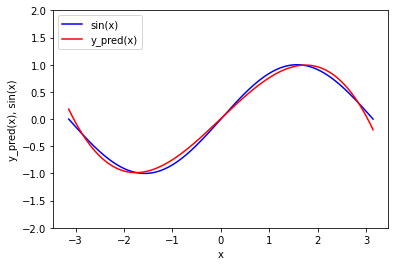

In [24]:
x = np.linspace(-math.pi, math.pi, 1000)
y = np.sin(x)
y_pred = a.item() + b.item()*x + c.item()*x**2 + d.item()*x**3

plt.ylim(-2,2)
plt.plot(x, y, "-b", label="sin(x)")
plt.plot(x, y_pred, "-r", label="y_pred(x)")
plt.xlabel("x")
plt.ylabel("y_pred(x), sin(x)")
plt.legend(loc="upper left")

# Neural network in Keras

In [25]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Dropout, MaxPooling2D, AveragePooling2D, Flatten, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist, cifar10
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [26]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:08:00.0, compute capability: 6.1



## Load Data

In [27]:
epochS=5
batch=128
lr0=1e-3

In [28]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

shapeI=trainX.shape[1:4]
ile_klas=trainY.shape[1]  #ile_klas

## Define model

Models in Keras are defined as a sequence of layers.

In [29]:
#feature extraction
model=Sequential()
model.add(Input(shape=shapeI))
model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation('relu'))

#klasyfikator
model.add(Flatten())
model.add(Dense(ile_klas))
model.add(Activation('softmax'))

## Compile model

Compiling the model uses efficient numerical libraries. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In [30]:
opt = SGD(momentum=0.4, learning_rate=lr0)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Fit model

Training a network means finding the best set of weights to map inputs to outputs in our dataset.

We can train or fit our model on our loaded data by calling the fit() function on the model.
Training occurs over epochs and each epoch is split into batches.
* Epoch: One pass through all of the rows in the training dataset.
* Batch: One or more samples considered by the model within an epoch before weights are updated.

In [31]:
h3 = model.fit(trainX, trainY, batch_size=batch, epochs=epochS)

Epoch 1/5
391/391 [==============================] - 4s 5ms/step - loss: 2.2252 - accuracy: 0.1785
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 1.9983 - accuracy: 0.3115
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 1.9014 - accuracy: 0.3459
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 1.8604 - accuracy: 0.3594
Epoch 5/5
391/391 [==============================] - 2s 4ms/step - loss: 1.8162 - accuracy: 0.3753


## Evaluate model

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset.

In [32]:
loss, accuracy = model.evaluate(testX, testY)

313/313 [==============================] - 1s 3ms/step - loss: 1.8026 - accuracy: 0.3781


## Make predictions

In [33]:
predictions = model.predict(testX)

In [34]:
nazwy = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=nazwy))

              precision    recall  f1-score   support

    airplane       0.44      0.49      0.46      1000
  automobile       0.47      0.39      0.42      1000
        bird       0.28      0.18      0.22      1000
         cat       0.26      0.25      0.25      1000
        deer       0.39      0.24      0.29      1000
         dog       0.30      0.39      0.34      1000
        frog       0.35      0.53      0.42      1000
       horse       0.43      0.34      0.38      1000
        ship       0.47      0.47      0.47      1000
       truck       0.40      0.51      0.45      1000

    accuracy                           0.38     10000
   macro avg       0.38      0.38      0.37     10000
weighted avg       0.38      0.38      0.37     10000



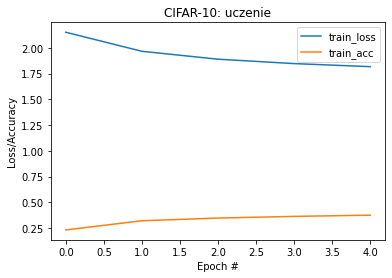

In [35]:
N = np.arange(0, epochS)
title = "CIFAR-10: uczenie"
plt.figure()
plt.plot(N, h3.history["loss"], label="train_loss")
plt.plot(N, h3.history["accuracy"], label="train_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# Neural network in PyTorch

### Separating hyperplane

$ x_2 = -\dfrac{w_1}{w_2}x_1 - \dfrac{b}{w_2}$

![Hiperplane](https://i.imgur.com/LCAUjbV.png)

In [84]:
def get_separating_hyperplane(arg, w):
    return - ((w[1] / w[2]) * arg + (w[0] / w[2]))

# Perceptron

## 1. Fixed data

![Data](https://i.imgur.com/rr84OhI.png)

In [51]:
feature_data = {
    'o' : [
        [-2.0, -1.0], [-1.0, -1.5], [2.0, -2.0]
    ],
    '+' : [
        [-2.0, 1.0], [1.0, 1.0], [1.5, -0.5]
    ]
}

colors = {
    'o': 'green',
    '+': 'blue'
}

class_weights = {
    'o': -1.0,
    '+': 1.0
}

## 1.1 Fixed weights

$ w =\begin{pmatrix}
  0 \\
  1 \\
  0.5 
\end{pmatrix}$  

In [38]:
weights = [0.0, 1.0, 0.5]

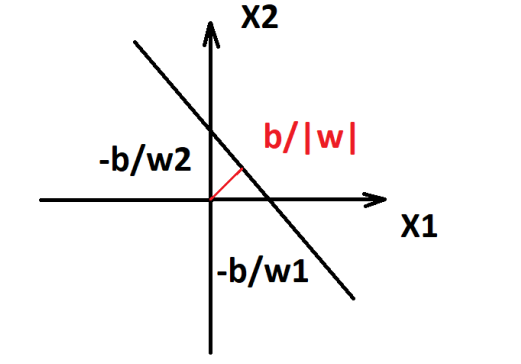

In [107]:
def x_range(data):
    min_x = 99
    max_x = -99
    
    all_values = list(itertools.chain.from_iterable(data.values()))
    for val in all_values:
        if val[0] < min_x:
            min_x = val[0]

        if val[0] > max_x:
            max_x = val[0]
    
    return (min_x, max_x)

def show_separation(data, whg, title):
    (min_x, max_x) = x_range(data)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.set_title("{}, weights={}".format(title, whg))
    ax.set_ylim(-3, 3)
    
    all_values = list(itertools.chain.from_iterable(data.values()))
    
    x_values = []
    y_values = []
    
    for x in np.linspace(min_x - 0.5, max_x + 0.5, len(all_values)):
        x_values.append(x)
        y_values.append(get_separating_hyperplane(x, whg))
    
    ax.plot(x_values, y_values, color='red', lw=3)

    for feature in data:
        for val in data[feature]:
            ax.scatter(val[0], val[1], marker=feature, color=colors[feature], s=250)

In [108]:
def classify(xi, wghts):
    return xi[0] * wghts[0] + xi[1] * wghts[1] + xi[2] * wghts[2]

def check_classification(val, cls):
    if cls == 'o' and val < 0:
        return True
    
    if cls == '+' and val >= 0:
        return True
    
    return False

def update_weights(xi, class_value, wghts, sig):
    updated_weights = []

    for i, wi in enumerate(wghts):
        updated_weights.append(wi + (sig * class_value * xi[i]))
    
    return updated_weights

def iterate_epochs(n, data, weights, sig, class_weights):
    show_separation(data, weights, "Initial hyperplane")    
    
    weights_copy = weights
    
    for i, epoch in enumerate(range(1, n + 1)):
        done = True
        for feature in data:
            for x, y in data[feature]:
                xi = (1.0, x, y)
                class_result = classify(xi, weights_copy)
                is_correct_class = check_classification(class_result, feature)
                
                if not is_correct_class:
                    weights_copy = update_weights(xi, class_weights[feature], weights_copy, sig)
                    done = False

        show_separation(data, weights_copy, "Epoch: {}".format(epoch))
        if done: break 

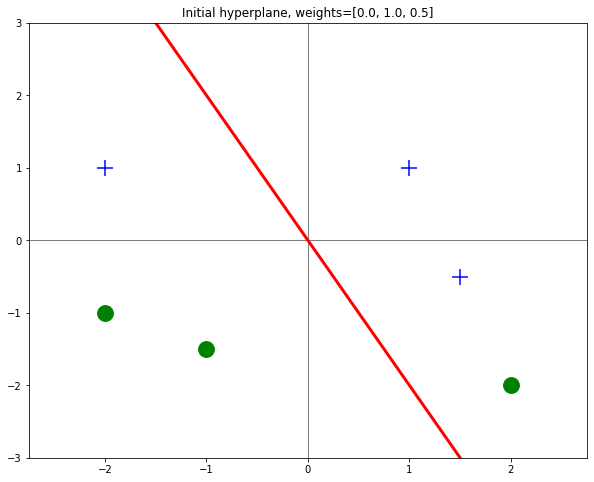

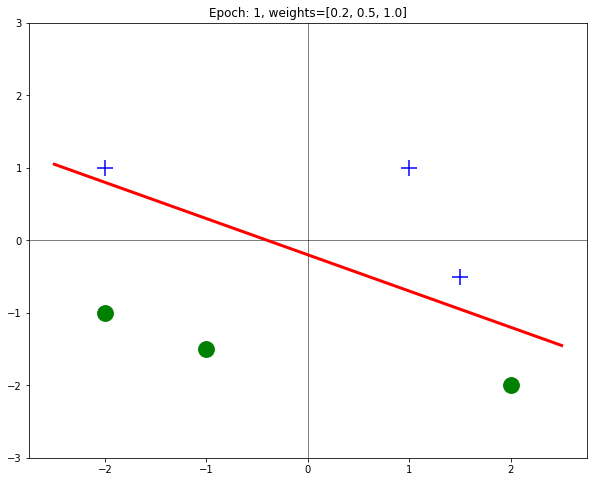

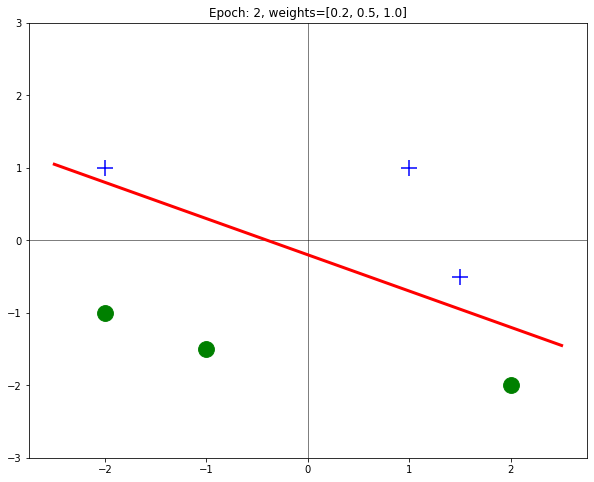

In [109]:
epochs = 10
sig = 0.2

iterate_epochs(epochs, feature_data, weights, sig, class_weights)    